<a href="https://colab.research.google.com/github/marycarmenvv/Machine_Learning_HW/blob/main/Machine_Learning_Technique_NOFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maria del Carmen Vargas Villarreal A00828570**

**Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**


Módulo: 2. Aprendizaje máquina (automático). sem 3

# Implementación de Regresión Logística

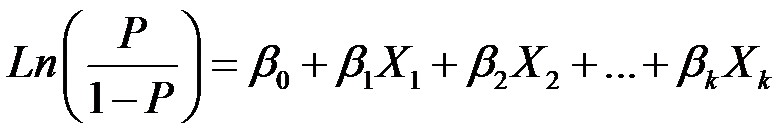

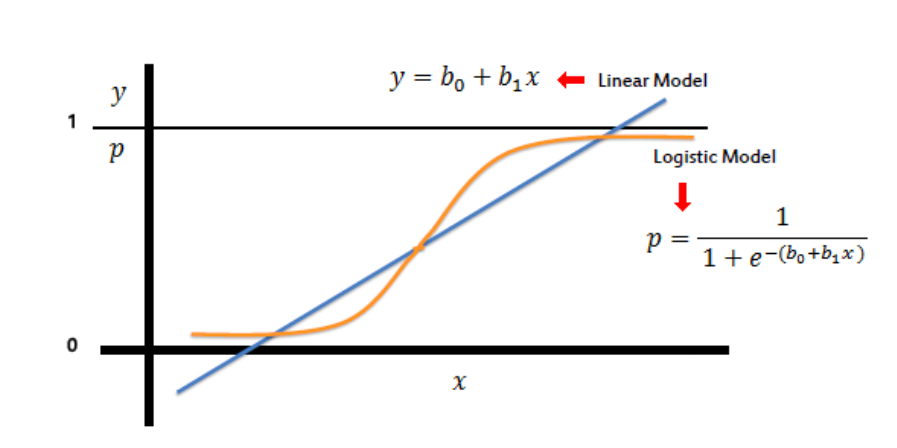

Importamos librerias

In [52]:
import numpy as np
import pandas as pd
from math import exp

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


Cargamos dataset Titanic

In [53]:
df_titanic = pd.read_csv("/content/drive/Shareddrives/AAA INTELIGENCIA ARTIFICIAL /Reto/train.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Aplicamos el Label Encoder en las variables que lo necesitan. En este caso, solo utilizaremos la variable "Sex"


In [55]:

label_E_Sex = preprocessing.LabelEncoder()
label_E_Sex.fit(df_titanic['Sex'].unique().tolist())
df_titanic['Sex'] = label_E_Sex.transform(df_titanic['Sex'])


Dividimos en training y test set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_titanic[ 'Sex'], df_titanic['Survived'], test_size=0.20)

Construcción del modelo de Regresión Logística

In [57]:

# Función para normalizar los datos
def normalizacion_datos(X):
    return X - X.mean()

# Función para realizar predicciones
def predicciones(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X]) # La probabilidad p que es en realidad la función sigmoide una vez despejada

# Función de Regresión Logística
def regresion_logistica(X, Y):

    X = normalizacion_datos(X)

    # Initializing variables
    b0 = 0
    b1 = 0 # Solo hasta b1 ya que solo es una "feature"
    learning_rate = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predicciones(X, b0, b1)

        # Implementación del algoritmo Gradiente Descendiente, el cual estima los parámetros minimizando el error en gran medida y se
        # va actualizando por si mismo hasta llegar al mínimo error. 
        # Cada iteración se le conoce como "epochs"
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # D_bi corresponde a las derivadas parciales
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  
        b0 = b0 - learning_rate * D_b0
        b1 = b1 - learning_rate * D_b1
    
    return b0, b1

Entrenamos el modelo

In [58]:
b0, b1 = regresion_logistica(X_train, y_train)


Se realizan las predicciones

In [ ]:

X_test_norm = normalizacion_datos(X_test)
y_pred = predicciones(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred] # El threshold es 0.5 ya que por la función sigmoide, esta
                                                #  intercepta en el punto 0.5 del eje "y" cuando se grafica


Evaluamos el modelo con la métrica Accuracy

In [62]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print("Accuracy", accuracy / len(y_pred))

Accuracy 0.5418994413407822


Obtenemos la matriz de confusión

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[72, 43],
       [39, 25]])